## icepyx PyPI Statistics
Use PyPIStats library to get data on PyPI downloads of icepyx (or any other package)

See the [pypistats website](https://github.com/hugovk/pypistats) for potential calls, options, and formats (e.g. markdown, rst, html, json, numpy, pandas)

**Note: currently this needs to be run manually (should be able to run all cells) and the changes committed.**

In [1]:
import os
import pypistats
import pandas as pd
# !pip install --upgrade "pypistats[pandas]" # may need this if pypistats wasn't installed with it
# Note: a numpy version is also available

In [2]:
cwd = os.getcwd()

trackpath= cwd + '/' # '/doc/source/tracking/pypistats/'
downloadfn = "downloads_data.csv"
sysdownloadfn = "sys_downloads_data.csv"

In [3]:
downloads = pypistats.overall("icepyx", total=True, format="pandas").drop(columns=['percent'])
downloads = downloads[downloads.category != "Total"]

# try:
exist_downloads = pd.read_csv(trackpath+downloadfn, index_col=0)#.drop(columns=['percent'])
# exist_downloads = exist_downloads[exist_downloads.category != "Total"]
dl_data = downloads.merge(exist_downloads, how='outer', 
                          on=['category','date','downloads']).reindex()
# except:
#     dl_data = downloads
    
dl_data.to_csv(trackpath+downloadfn)

In [4]:
sysdownloads = pypistats.system("icepyx", total=True, format="pandas").drop(columns=['percent'])
sysdownloads = sysdownloads[sysdownloads.category != "Total"]
# try:
exist_sysdownloads = pd.read_csv(trackpath+sysdownloadfn, index_col=0)#.drop(columns=['percent'])
# exist_sysdownloads = exist_sysdownloads[exist_sysdownloads.category != "Total"]
# exist_sysdownloads['category'] = exist_sysdownloads['category'].fillna("null")
sysdl_data = sysdownloads.merge(exist_sysdownloads, how='outer', 
                              on=['category','date','downloads']).reindex()
# except:
#     dl_data = sysdownloads
    
sysdl_data.to_csv(trackpath+sysdownloadfn)

<ipython-input-5-4f5b1efa3c4e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  chart.figure.show()


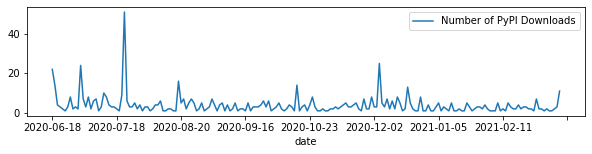

In [5]:
dl_data = dl_data.groupby("category").get_group("without_mirrors").sort_values("date")

chart = dl_data.plot(x="date", y="downloads", figsize=(10, 2),
                       label="Number of PyPI Downloads")
chart.figure.show()
chart.figure.savefig(trackpath+"downloads.svg")